<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [4]:
from tqdm import tqdm_notebook

In [5]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_wine.loc[:, 'quality'] = (df_wine.loc[:, 'quality'] > 5).astype(int)

In [8]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values

In [12]:
print(X[:10])
print(y)

[[  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+00   5.60000000e-01   9.40000000e+00]
 [  7.80000000e+00   8.80000000e-01   0.00000000e+00   2.60000000e+00
    9.80000000e-02   2.50000000e+01   6.70000000e+01   9.96800000e-01
    3.20000000e+00   6.80000000e-01   9.80000000e+00]
 [  7.80000000e+00   7.60000000e-01   4.00000000e-02   2.30000000e+00
    9.20000000e-02   1.50000000e+01   5.40000000e+01   9.97000000e-01
    3.26000000e+00   6.50000000e-01   9.80000000e+00]
 [  1.12000000e+01   2.80000000e-01   5.60000000e-01   1.90000000e+00
    7.50000000e-02   1.70000000e+01   6.00000000e+01   9.98000000e-01
    3.16000000e+00   5.80000000e-01   9.80000000e+00]
 [  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+00   5.60000000e-01   9.40000000e+00]
 [  7.40000000e+00   6.6000000

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [13]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [22]:
scores = []

for d in range(1, 20):
    model = DecisionTreeClassifier(max_depth=d, random_state=123)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    scores.append(score.mean())
    

/home/delta37/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


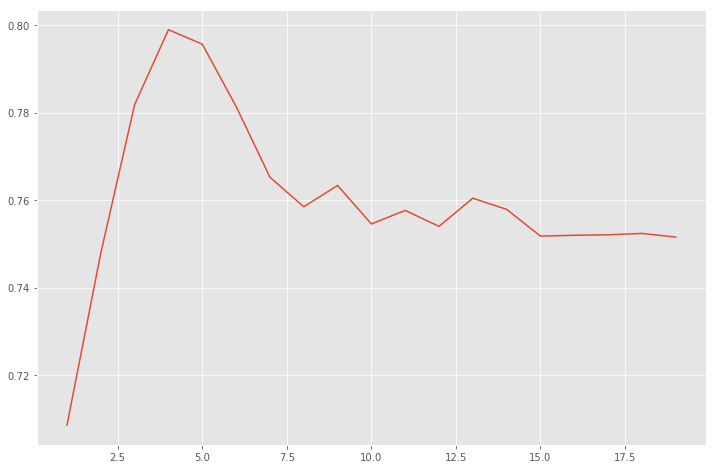

In [23]:
plt.plot(range(1,20), scores)

In [24]:
# При мере качества roc-auc виден явный пик на глубине 4
# Если выбрать меру качества accuracy, то выбрать оптимальную глубину окажется не так просто.

# Воспользуемся validation_curve
# По сути - этот метод делает тоже самое что наш цикл с cross_val_score, но в результате возвращаются мера качества
# как на тестовой части каждого из фолдов, так и на обучающей части

In [25]:
model = DecisionTreeClassifier(random_state=123)
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth',
                                             range(1, 20), n_jobs=-1, cv=5, scoring='roc_auc')

In [26]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

/home/delta37/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


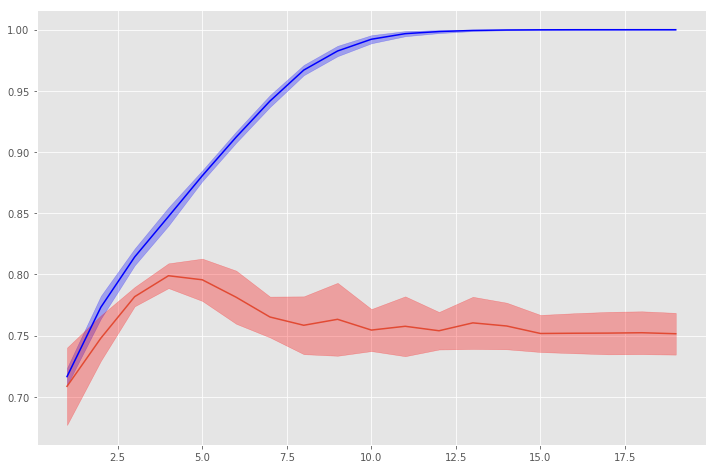

In [27]:
d = range(1,20)
plt.plot(d, train_mean, color='b')
plt.plot(d, test_mean)

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [50]:
# При roc-auc видем тот же самый пик
# Если выбрать меру качества accuracy, то на той глубине, где accuracy был наибольший (где-то в районе 13) ошибка на 
# на трейновой части минимальная - то есть очень сильное переобучение.

# Основываясь, во-первых, на том, что по roc-auc виден пик при max_depth=4, и во-вторых на том, что переобучение по 
# accuracy не такое сильное при max_depth=4, а качество будет повыше, чем в окрестности, то я бы выбрал глубину = 4

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [112]:
model = DecisionTreeClassifier(random_state=123, max_depth=4)
model = model.fit(X=X_train, y=y_train)
feat_name = list(df_wine.columns)[0:11]
vec_feat = list(zip(feat_name, model.feature_importances_))
vec_feat = sorted(vec_feat, key=lambda x : -x[1])
vec_feat

[('alcohol', 0.57458561536302932),
 ('sulphates', 0.16057994247268007),
 ('volatile acidity', 0.12647936864446638),
 ('total sulfur dioxide', 0.054715792374000712),
 ('free sulfur dioxide', 0.05226398318254942),
 ('pH', 0.017811772337276023),
 ('density', 0.013563525625998071),
 ('fixed acidity', 0.0),
 ('citric acid', 0.0),
 ('residual sugar', 0.0),
 ('chlorides', 0.0)]

Главное, это количество алкоголя, в принципе логично.

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [118]:
#предсказание на тестовой выборке
y_test_predict = model.predict(X=X_test)

/home/delta37/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


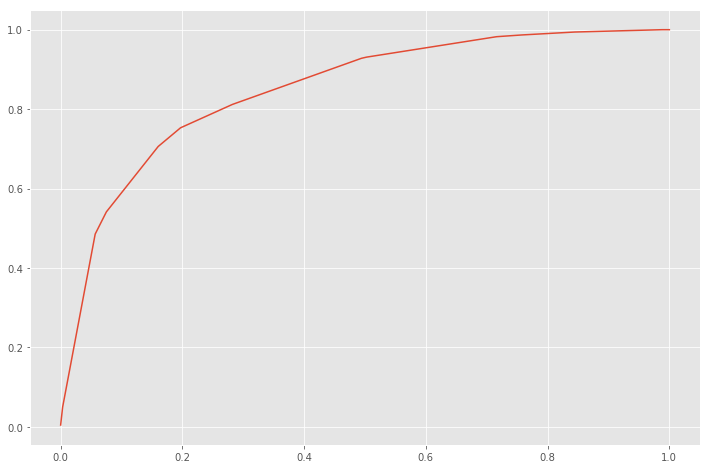

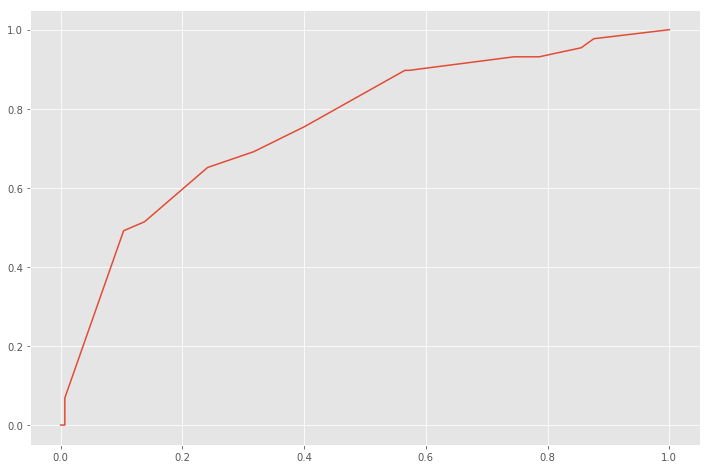

In [136]:
# ROC кривая для обучающей выборке
model = DecisionTreeClassifier(random_state=123, max_depth=4)
model = model.fit(X=X_train, y=y_train)
#train
y_train_predict = model.predict_proba(X=X_train)
y_train_predict = y_train_predict[:,1]
fp, tp, th = metrics.roc_curve(y_true=y_train, y_score=y_train_predict)
plt.plot(fp, tp)
plt.show()
#train
y_test_predict = model.predict_proba(X=X_test)
y_test_predict = y_test_predict[:,1]
fp, tp, th = metrics.roc_curve(y_true=y_test, y_score=y_test_predict)
plt.plot(fp, tp)
plt.show()

В принципе не сильное ухудшение

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

/home/delta37/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


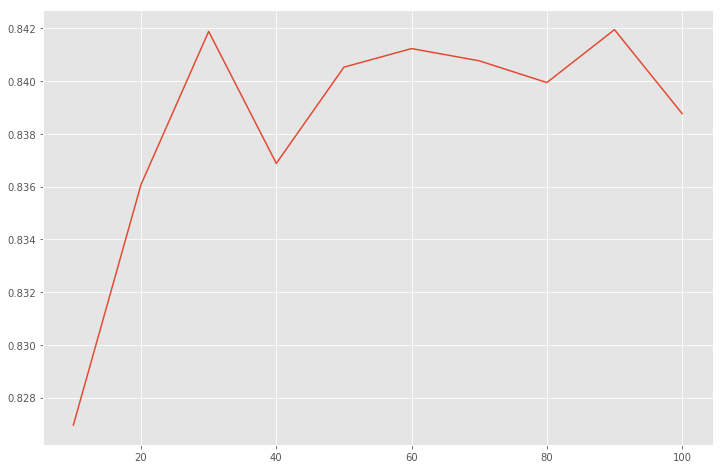

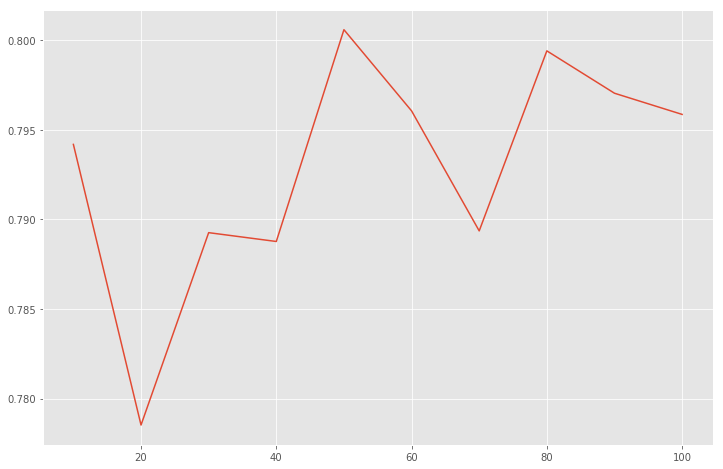

In [168]:
scores_train = []
scores_test = []
for d in range(1,11):
    clf = RandomForestClassifier(n_estimators=10 * d, max_depth=4)
    clf.fit(X_train, y_train)
    scores_train.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean())
    scores_test.append(cross_val_score(clf, X_test, y_test, cv=5, scoring='roc_auc').mean())
plt.plot(range(10,110,10), scores_train)
plt.show()
plt.plot(range(10,110,10), scores_test)
plt.show()

/home/delta37/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


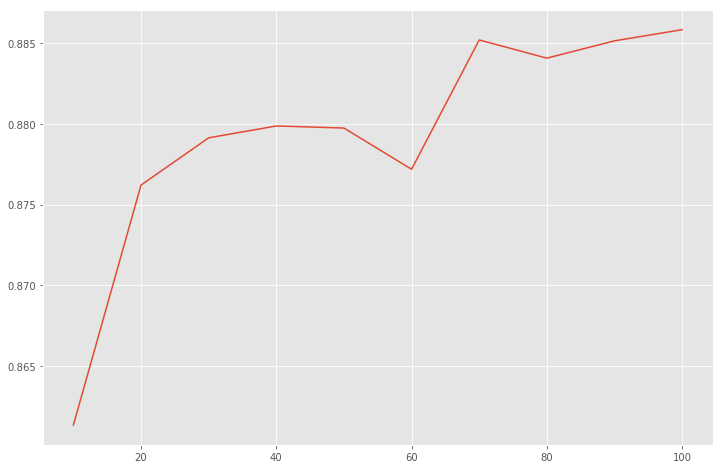

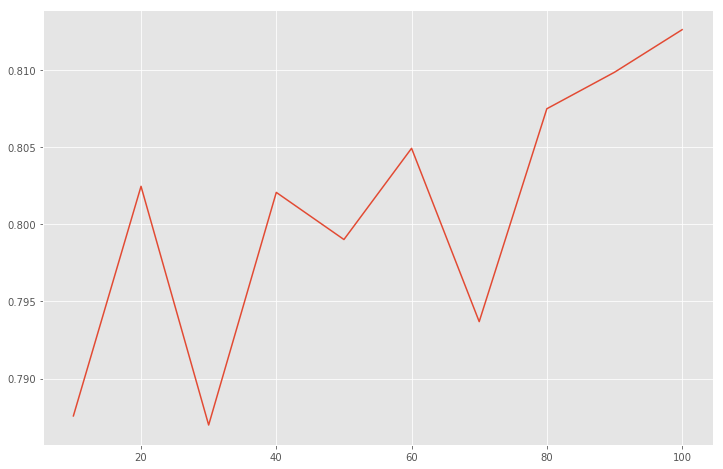

In [169]:
scores_train = []
scores_test = []
for d in range(1,11):
    clf = BaggingClassifier(n_estimators=10 * d)
    clf.fit(X_train, y_train)
    scores_train.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean())
    scores_test.append(cross_val_score(clf, X_test, y_test, cv=5, scoring='roc_auc').mean())
plt.plot(range(10,110,10), scores_train)
plt.show()
plt.plot(range(10,110,10), scores_test)
plt.show()

Обвалы графика на тестовой выборке свидетельствуют о переобучении при данном ко-ве деревьев.  
График качества на обучающей выборке в основном возрастает.

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [145]:
from sklearn.model_selection import GridSearchCV

In [171]:
clf = GridSearchCV(
    RandomForestClassifier(max_depth=4), 
    param_grid={'n_estimators' : range(10, 110, 10)}, 
    scoring='roc_auc',
    n_jobs =-1
)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(10, 110, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [172]:
print(clf.best_params_)

{'n_estimators': 50}


То есть наилучшее количество - 50.
И из графиков выше для RandomForestClassifier мы видим именно на отметке 50 наилучший результат, 
как на обучающей, так и на тесовой выборке

In [178]:
clf = RandomForestClassifier(max_depth=4,n_estimators=50)
clf.fit(X_train, y_train)
y_predict = clf.predict_proba(X_test)[:,1]

/home/delta37/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


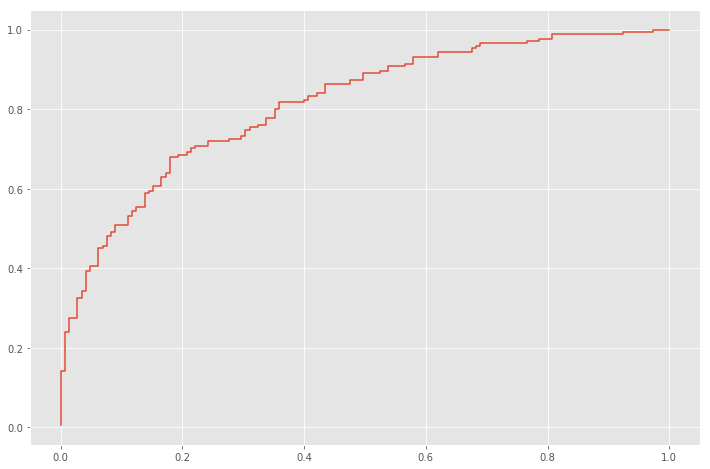

In [179]:
fp, tp, th = roc_curve(y_true=y_test, y_score=y_predict)
plt.plot(fp, tp)

Довольно неплохая классификация.